In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import glob
import pickle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

%matplotlib inline

In [3]:
nodule_files = glob.glob('/media/data/kaggle/*.pickle')
with open(nodule_files[0], "rb") as f:
    data = pickle.load(f, encoding='latin1')

for nodule_file in nodule_files[1:]:
    with open(nodule_file, "rb") as f:
        tmp = pickle.load(f, encoding='latin1')
        data = np.hstack((data, tmp))
        
data = np.swapaxes(data, 0, 1)

In [4]:
num_patients = data.shape[0]
print("Number of patients:", num_patients)

Number of patients: 1397


Patient ID: 8a17bbe3cc0079c6d7d7579359bcf565
Patient label: 0
Number of nodules detected for patient: 77


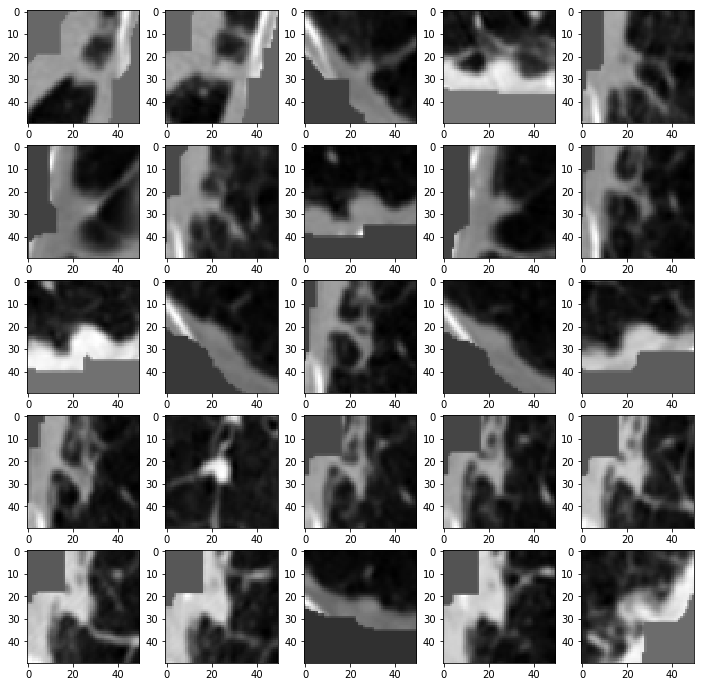

In [5]:
# Detected nodules for non-cancerous patient
patient_number = 1
print("Patient ID:", path.split(data[patient_number][1])[1])
print("Patient label:", data[patient_number][2])
print("Number of nodules detected for patient:", len(data[patient_number][0]))

fig, ax = plt.subplots(5, 5,figsize=(12, 12))
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(data[patient_number][0][i * 5 + j], cmap='gray')

Patient ID: d777a77cc7a2ec2f1eed68799cc9075c
Patient label: 1
Number of nodules detected for patient: 30


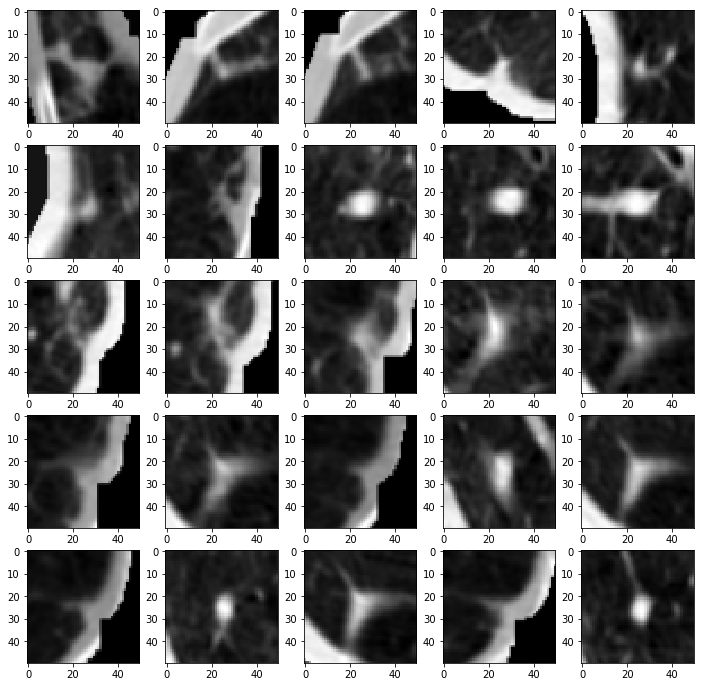

In [6]:
# Detected nodules for non-cancerous patient
patient_number = 2
print("Patient ID:", path.split(data[patient_number][1])[1])
print("Patient label:", data[patient_number][2])
print("Number of nodules detected for patient:", len(data[patient_number][0]))

fig, ax = plt.subplots(5, 5,figsize=(12, 12))
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(data[patient_number][0][i * 5 + j], cmap='gray')

In [ ]:
# Prepare data for training
nodules = data[0][0]
labels = np.ones(data[0][0].shape[0]) * data[0][2]
for idx, patient in enumerate(data[1:]):
    if patient[0].any():
        labels = np.concatenate((labels, np.ones(patient[0].shape[0]) * patient[2]))
        nodules = np.vstack((nodules, patient[0]))
        
num_classes = 2
num_samples = nodules.shape[0]
img_rows = nodules.shape[1]
img_cols = nodules.shape[2]

X_train, X_test, y_train, y_test = train_test_split(nodules, labels, test_size=0.33, random_state=42)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)        

In [7]:
load = True

if load == True:
    data = np.load('./train_data.npy')
    labels = data.all()['labels']
    nodules = data.all()['nodules']

num_classes = 2
num_samples = nodules.shape[0]
img_rows = nodules.shape[1]
img_cols = nodules.shape[2]    
    
X_train, X_test, y_train, y_test = train_test_split(nodules, labels, test_size=0.33, random_state=42)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print('Num train samples:', len(y_train))
print('Num test samples:', len(y_test))

Num train samples: 20028
Num test samples: 9866


In [ ]:
batch_size = 128
num_classes = 2
epochs = 10

# input image dimensions
img_rows, img_cols = 50, 50
# number of convolutional filters to use
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(filters, kernel_size, kernel_size, 
           border_mode='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size, nb_epoch=epochs,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [13]:
%%time

from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 128
epochs = 20

model = Sequential()
model.add(Conv2D(32, 3, 3,
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=epochs,
          verbose=2, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 20028 samples, validate on 9866 samples
Epoch 1/20
3s - loss: 0.6570 - acc: 0.6517 - val_loss: 0.6436 - val_acc: 0.6568
Epoch 2/20
3s - loss: 0.6423 - acc: 0.6539 - val_loss: 0.6381 - val_acc: 0.6568
Epoch 3/20
3s - loss: 0.6367 - acc: 0.6547 - val_loss: 0.6352 - val_acc: 0.6573
Epoch 4/20
3s - loss: 0.6282 - acc: 0.6589 - val_loss: 0.6357 - val_acc: 0.6574
Epoch 5/20
3s - loss: 0.6191 - acc: 0.6636 - val_loss: 0.6326 - val_acc: 0.6597
Epoch 6/20
3s - loss: 0.6079 - acc: 0.6722 - val_loss: 0.6330 - val_acc: 0.6600
Epoch 7/20
3s - loss: 0.5952 - acc: 0.6834 - val_loss: 0.6322 - val_acc: 0.6648
Epoch 8/20
3s - loss: 0.5772 - acc: 0.6990 - val_loss: 0.6270 - val_acc: 0.6716
Epoch 9/20
3s - loss: 0.5566 - acc: 0.7119 - val_loss: 0.6316 - val_acc: 0.6742
Epoch 10/20
3s - loss: 0.5328 - acc: 0.7303 - val_loss: 0.6289 - val_acc: 0.6745
Epoch 11/20
3s - loss: 0.5053 - acc: 0.7505 - val_loss: 0.6399 - val_acc: 0.6612
Epoch 12/20
3s - loss: 0.4779 - acc: 0.7694 - val_loss: 0.6437 - val_

In [14]:
model.save_weights('./data/kaggle/convnet_nodules.h5')